In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from var_es_toolbox.data import load_data

In [2]:
project_dir = Path.cwd().parent
data_dir = project_dir / "data"
data_merged_name = "data_merged.csv"
date_format = "%Y-%m-%d"

data_merged = load_data(data_dir / data_merged_name, date_format=date_format)

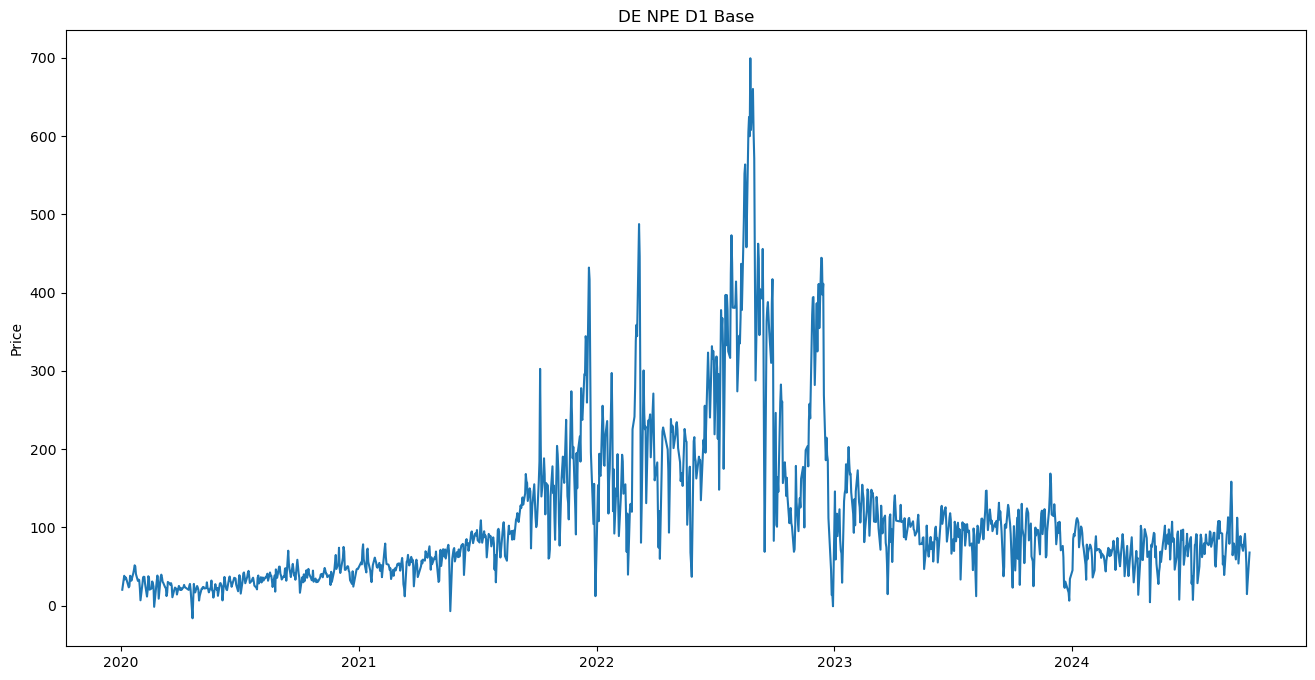

In [3]:
futures_price = data_merged.iloc[:, 0]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(futures_price)
ax.set(title="DE NPE D1 Base", ylabel="Price")
plt.show()

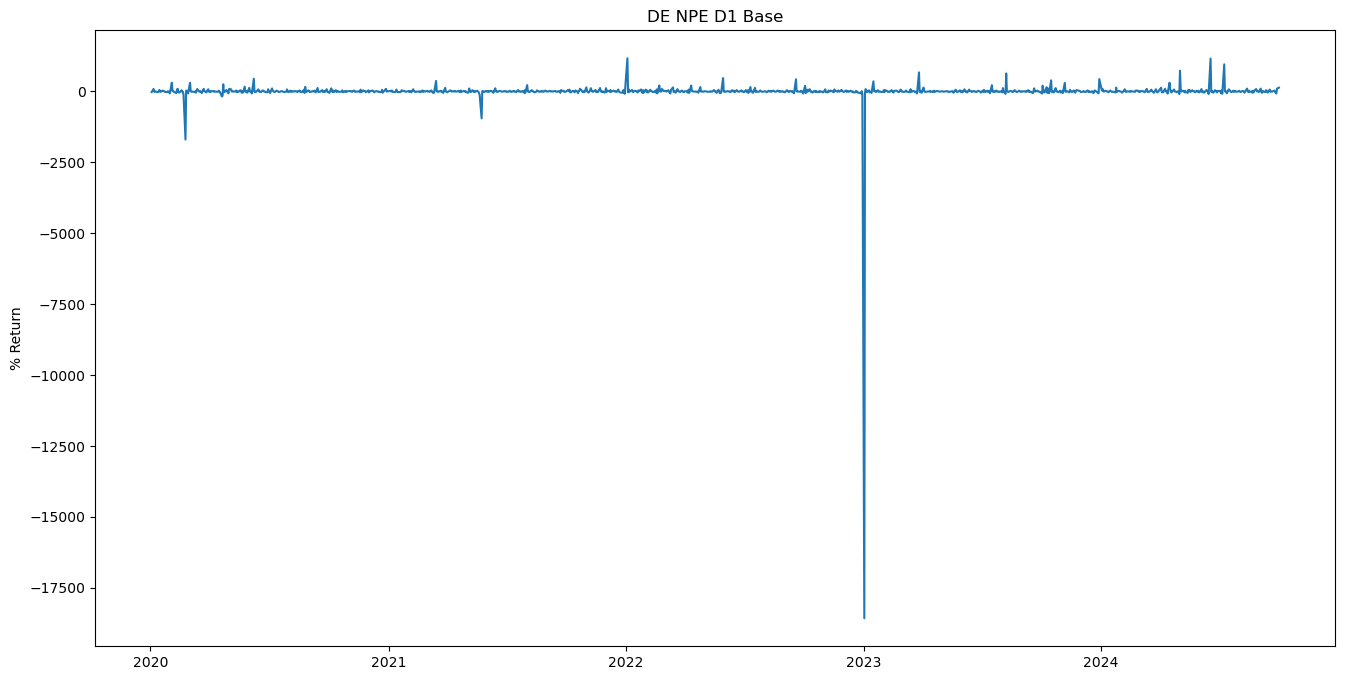

In [4]:
futures_return = data_merged.iloc[:, 1]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(futures_return)
ax.set(title="DE NPE D1 Base", ylabel="% Return")
plt.show()

In [5]:
print(f"Summary:\n{data_merged.describe(include='all')}")
print(f"Skewness:\n {data_merged.skew()}")
print(f"Kurtosis:\n {data_merged.kurt()}")

Summary:
       NPE EDEFB D1  NPE EDEFB D1 - return  Total electricity demand  \
count   1214.000000            1214.000000               1214.000000   
mean     112.821285              -6.609668               1493.038875   
std      102.264671             542.647770                114.154696   
min      -16.150000          -18574.683544               1117.826000   
25%       46.727500             -15.542703               1409.483250   
50%       84.495000              -2.286501               1476.203500   
75%      130.770000              15.487248               1579.933750   
max      699.440000            1168.920033               1780.312000   

       Total electricity supply  
count               1214.000000  
mean                1491.460470  
std                  207.451253  
min                  993.087000  
25%                 1332.739250  
50%                 1477.392500  
75%                 1640.078250  
max                 1985.553000  
Skewness:
 NPE EDEFB D1             

In [6]:
daily_volatility = data_merged.iloc[:, 0].std()
print(f"Daily volatility: {daily_volatility}%")

monthly_trade_days = 21
monthly_volatility = np.sqrt(monthly_trade_days) * daily_volatility
print(f"Monthly volatility: {monthly_volatility}%")

yearly_trade_days = 252
yearly_volatility = np.sqrt(yearly_trade_days) * daily_volatility
print(f"Yearly volatility: {yearly_volatility}%")

Daily volatility: 102.264671191693%
Monthly volatility: 468.635596655703%
Yearly volatility: 1623.4013272860661%


In [8]:
from scripts.activate_renv import activate_renv

activate_renv()

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython
pandas2ri.activate()

* Project 'C:/Users/chris/PycharmProjects/var-es-toolbox' loaded. [renv 0.17.3]


C:\Users\chris\Anaconda\envs\var-es-environment\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [16]:
robjects.globalenv['df_price'] = pandas2ri.py2rpy(futures_price.reset_index(drop=True))
robjects.globalenv['df_return'] = pandas2ri.py2rpy(futures_return.reset_index(drop=True))

In [18]:
%%R

cat("Summary of df_price:\n")
print(summary(df_price))

cat("\nSummary of df_return:\n")
print(summary(df_return))

Summary of df_price:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -16.15   46.73   84.50  112.82  130.77  699.44 

Summary of df_return:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-18574.684    -15.543     -2.287     -6.610     15.487   1168.920 
